In [67]:
# import necessary packages

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [69]:
# import th data set
bankloans=pd.read_csv(r"D:\pooja files\ml and ai classes\class-3\case study bankloans\bankloans.csv")

### Data Audit

In [70]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [71]:
bankloans.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [72]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [73]:
bankloans.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [74]:
# there are no missing values and all data types are correct.

In [75]:
# splitting the data into two parts i.e. 700 observations are past data, and last 150 observations are unknown data.

In [76]:
bankloans_existing = bankloans[bankloans.default.isnull()==0]   # past data
bankloans_new = bankloans[bankloans.default.isnull()==1]     # unknown data 

In [77]:
bankloans_existing

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [78]:
bankloans_new

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [79]:
bankloans_existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [80]:
y = bankloans_existing.default
x = bankloans_existing[bankloans_existing.columns.difference(['default'])]

In [81]:
x

,address,age,creddebt,debtinc,ed,employ,income,othdebt
0,12,41,11.359392,9.3,3,17,176,5.008608
1,6,27,1.362202,17.3,1,10,31,4.000798
2,14,40,0.856075,5.5,1,15,55,2.168925
3,14,41,2.658720,2.9,1,15,120,0.821280
4,0,24,1.787436,17.3,2,2,28,3.056564
...,...,...,...,...,...,...,...,...
695,15,36,0.262062,4.6,2,6,27,0.979938
696,4,29,0.369495,11.5,2,6,21,2.045505
697,3,33,0.491264,7.6,1,15,32,1.940736
698,22,45,2.302608,8.4,1,19,77,4.165392


In [82]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [83]:
# splitting the data into train and test data with 70% train data and 30% test data

In [84]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=123)

In [85]:
# checking train_x and train_y shape
train_x.shape,test_x.shape

((490, 8), (210, 8))

In [91]:
#finding the best parameters
grid = {'max_depth':[3,4,5,6,7,8], 'max_leaf_nodes': [5,6,7,8,9,10,11,12,13,14], 'max_features':[3,4,5,6]}

DT_model_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=grid, scoring='f1', n_jobs=-1,verbose=True, cv=5 )
DT_model_gs = DT_model_gs.fit(train_x, train_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [92]:
DT_model_gs.best_params_

{'max_depth': 8, 'max_features': 5, 'max_leaf_nodes': 11}

In [93]:
DT_model_final = DecisionTreeClassifier(max_depth=8, max_features=5, max_leaf_nodes=11)
DT_model_final = DT_model_final.fit(train_x, train_y)

In [94]:
# classification report for train data
print(metrics.classification_report(train_y, DT_model_final.predict(train_x)))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       358
         1.0       0.71      0.49      0.58       132

    accuracy                           0.81       490
   macro avg       0.77      0.71      0.73       490
weighted avg       0.80      0.81      0.80       490



In [95]:
# classification report for test data
print(metrics.classification_report(test_y, DT_model_final.predict(test_x)))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       159
         1.0       0.55      0.33      0.41        51

    accuracy                           0.77       210
   macro avg       0.68      0.62      0.64       210
weighted avg       0.75      0.77      0.75       210



In [96]:
# visualizing the decision tree

In [97]:
os.environ["PATH"] += os.pathsep + r'D:\pooja files\ml and ai classes\Graphviz\bin'

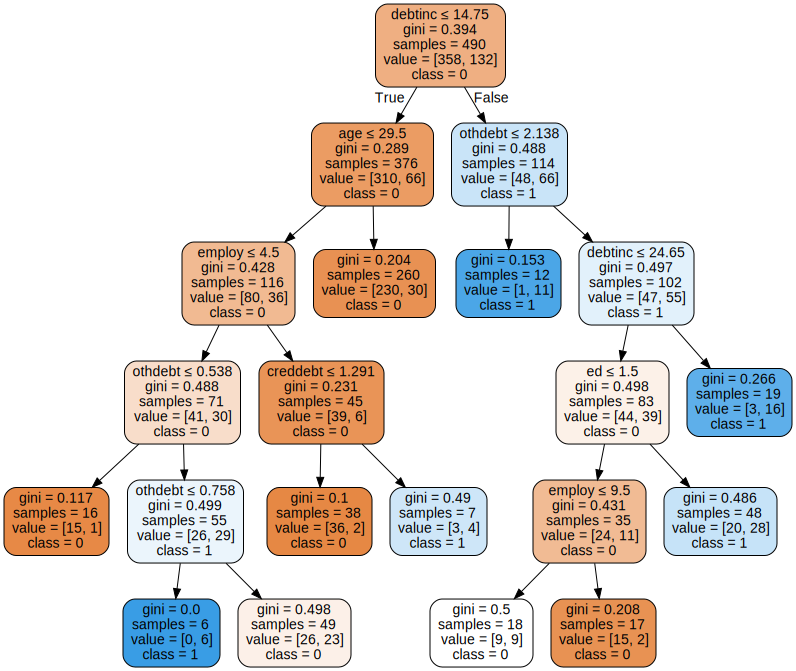

In [98]:
import graphviz
fig=tree.export_graphviz(DT_model_final,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_x.columns,class_names=['0','1'])
chart=graphviz.Source(fig)
chart

In [39]:
#  predicting the bankloans_new data set with model

In [99]:
predicted=(pd.DataFrame(DT_model_final.predict(bankloans_new.drop(columns='default')))).rename(columns={0:'default'})

In [100]:
pd.concat([bankloans_new.drop(columns='default').reset_index(drop=True),predicted],axis=1)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,36,1,16,13,32,10.9,0.544128,2.943872,1.0
1,50,1,6,27,21,12.9,1.316574,1.392426,1.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,1.0
...,...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672,1.0
146,32,2,12,11,116,5.7,4.026708,2.585292,1.0
147,48,1,13,11,38,10.8,0.722304,3.381696,1.0
148,35,2,1,11,24,7.8,0.417456,1.454544,0.0


### conclusion:
### Created a model with help of decision tree classifier and predicted the defaulters from unknown data set. 